# Hierarchical Clustering

In [4]:
# import data science libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

# import sklearn libraries
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

# import scipy libraries
from scipy.cluster.hierarchy import dendrogram, linkage

In [2]:
# import data from csv file
df = pd.read_csv('datasets/customers.csv')
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [7]:
# separate the last 3 columns from the rest of the data
X = df.iloc[:, 2:]
X.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


In [5]:
# graph X using plotly
fig = px.scatter_3d(X, x='Age', y='Annual Income (k$)', z='Spending Score (1-100)')
fig.show()

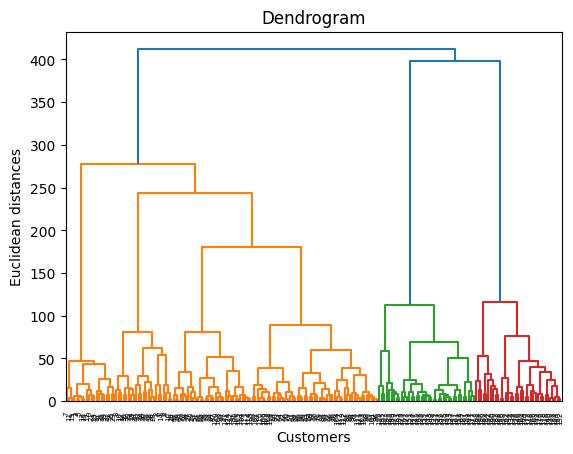

In [6]:
dendo = dendrogram(linkage(X, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()


From the dendogram, we can see that the optimal number of clusters is 3, followed by 5. Therefore we train a model with 3 clusters and another with 5 clusters.

In [8]:
# train a hierarchical clustering model
hc = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
y_hc = hc.fit_predict(X)

# graph the clusters with plotly
fig = px.scatter_3d(X, x='Age', y='Annual Income (k$)', z='Spending Score (1-100)', color=y_hc)
fig.show()

In [9]:
# train a hierarchical clustering model with 5 clusters
hc = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
y_hc = hc.fit_predict(X)

# graph the clusters with plotly
fig = px.scatter_3d(X, x='Age', y='Annual Income (k$)', z='Spending Score (1-100)', color=y_hc)
fig.show()